In [2]:
import aomip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from tifffile import imsave, imread
import json
from os.path import join
from skimage.io import imread, imsave
import tifffile
import time

pyelsa not build with CUDA projector support


### Homework 1: Subgradient method

### 2D Least square problem

In [3]:
C = np.array([[2, 1], [1, 1]])
d = np.array([1, 1])
x0 = np.array([15, 15])
solution = np.array([0,1])
step = 1
def callback1(x,i):
    if i % step == 0:
        fs.append(x)
             

Computing the Subgradient of the L1-Norm with TV regularization on a 2D least square problem

(i) Fixes step length of $\alpha_k$=0.1

Elapsed time: 0.031418800354003906 seconds
minimum value:  [-0.02003575  1.03005785]
Iteration:  748
error norm:  0.03612347706987487


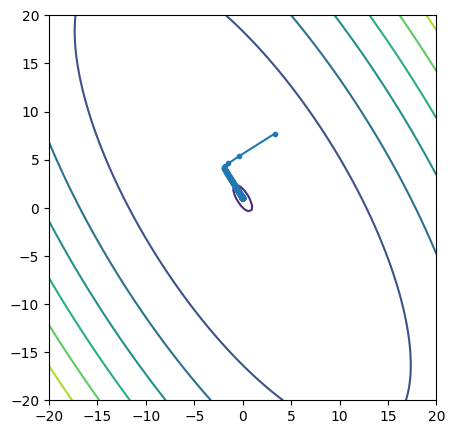

In [4]:
beta = 0.01
iteration = 1000
alpha = np.ones(iteration)*0.1

grad = lambda x : C.T.dot(C.dot(x) - d)
fs = []
xmin, stopIdx = aomip.subgradient(C,d,x0,beta,alpha,grad,iteration=2000,callback=callback1)
print('minimum value: ',xmin)
print('Iteration: ',stopIdx)
print("error norm: ",np.linalg.norm(solution-xmin))
plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)

fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()



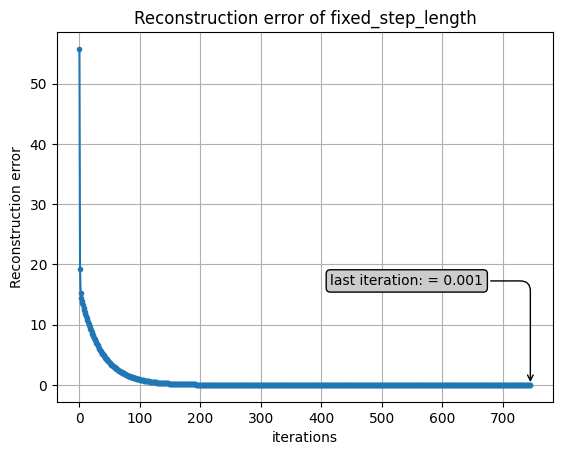

In [65]:
aomip.plot_convergence(solution,fs,stopIdx-1,'fixed_step_length','')

(ii) Square summable but not summable step size $\alpha_k=\frac{1}{k}$

As can be seen from the calculation below, with this step size it is shown that as k increses, $\lim_{k\to \infty}\frac{1}{k}$, $\sum_{i=1}^{\infty}\frac{1}{k}=\infty$ and $\sum_{i=1}^{\infty}(\frac{1}{k})^2<\infty$

In [6]:
iteration = 1e+5
alpha1 = 1 / np.arange(1, iteration+1)
sum_squared = np.sum(alpha1**2) # square summable
sums = np.sum(alpha1)  # summable
print('Sum of squared of step size for iteration {:.0f}: {:.9f}'.format(iteration,sum_squared)) 
print('Sum of step size for iteration {:.0f}: {:.9f}'.format(iteration,sums))

iteration = 1e+6
alpha2 = 1 / np.arange(1, iteration+1)
sum_squared = np.sum(alpha2**2) # square summable
sums = np.sum(alpha2)  # summable
print('Sum of squared of step size for iteration {:.0f}: {:.9f}'.format(iteration,sum_squared)) 
print('Sum of step size for iteration {:.0f}: {:.9f}'.format(iteration,sums))

iteration = 1e+7
alpha3 = 1 / np.arange(1, iteration+1)
sum_squared = np.sum(alpha3**2) # square summable
sums = np.sum(alpha3)  # summable
print('Sum of squared of step size for iteration {:.0f}: {:.9f}'.format(iteration,sum_squared)) 
print('Sum of step size for iteration {:.0f}: {:.9f}'.format(iteration,sums))

Sum of squared of step size for iteration 100000: 1.644924067
Sum of step size for iteration 100000: 12.090146130
Sum of squared of step size for iteration 1000000: 1.644933067
Sum of step size for iteration 1000000: 14.392726723
Sum of squared of step size for iteration 10000000: 1.644933967
Sum of step size for iteration 10000000: 16.695311366


Now test this new step size on a 2D least square problem for 30000, 50000 and 70000 iterations respectively

Elapsed time: 1.0019128322601318 seconds
Iteration:  30000
minimum value:  [-0.43873111  1.70752117]
error norm:  0.8325089740126664
30000


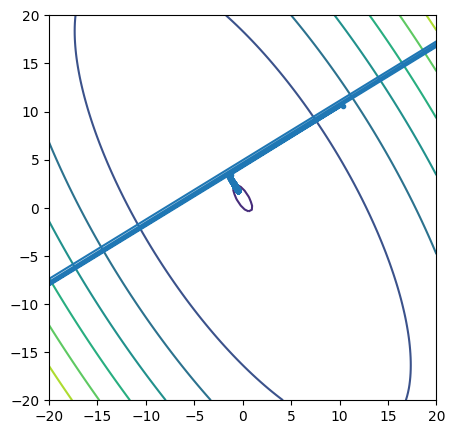

In [87]:
beta = 0.01
fs = []
xmin3, stopIdx3 = aomip.subgradient(C,d,x0,beta,alpha2,grad,iteration=30000,callback=callback1)
print('Iteration: ',stopIdx3)
print('minimum value: ',xmin3)
print("error norm: ",np.linalg.norm(solution-xmin3))
print(len(fs))
plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()


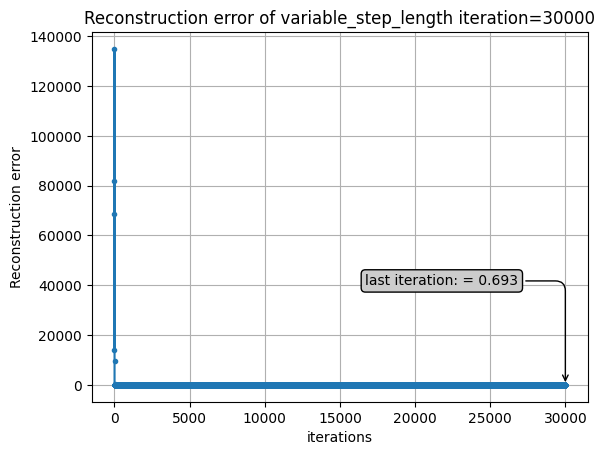

In [88]:
aomip.plot_convergence(solution,fs,stopIdx3,'variable_step_length iteration=30000','')

Elapsed time: 1.6412038803100586 seconds
Iteration:  50000
minimum value:  [-0.40865861  1.65886284]
error norm:  0.7753077474898764


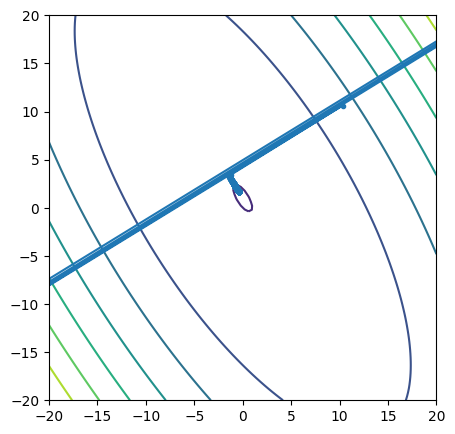

In [89]:
fs = []
xmin5, stopIdx5 = aomip.subgradient(C,d,x0,beta,alpha2,grad,iteration=50000,callback=callback1)
print('Iteration: ',stopIdx5)
print('minimum value: ',xmin5)
print("error norm: ",np.linalg.norm(solution-xmin5))

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)

fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()


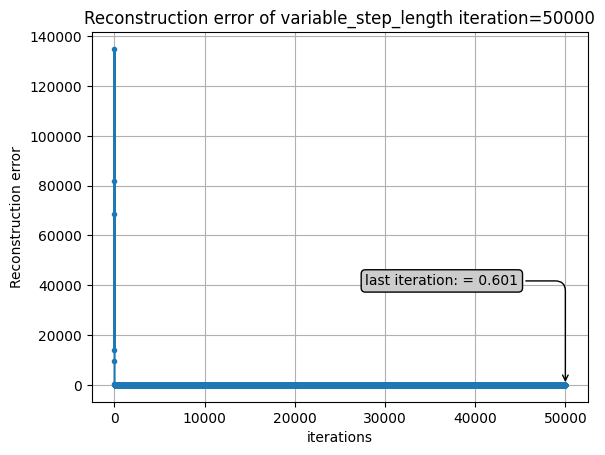

In [90]:
aomip.plot_convergence(solution,fs,stopIdx5,'variable_step_length iteration=50000','')

Elapsed time: 2.2832329273223877 seconds
Iteration:  70000
minimum value:  [-0.39003999  1.62873727]
error norm:  0.7398930657366753


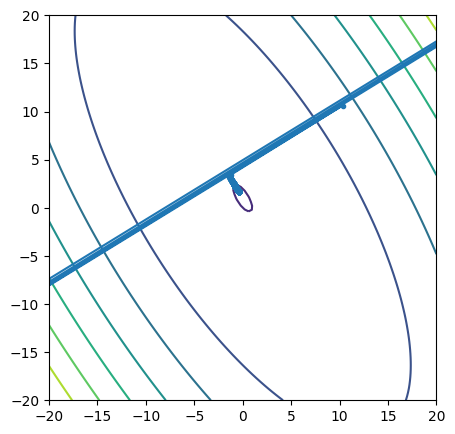

In [91]:
fs = []
xmin7, stopIdx7 = aomip.subgradient(C,d,x0,beta,alpha2,grad,iteration=70000,callback=callback1)
print('Iteration: ',stopIdx7)
print('minimum value: ',xmin7)
print("error norm: ",np.linalg.norm(solution-xmin7))

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)

fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()


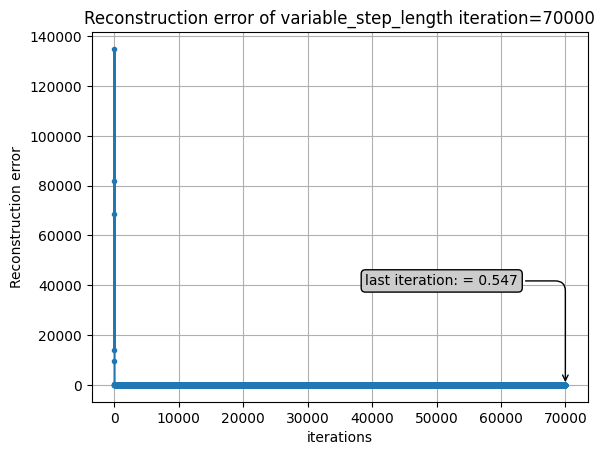

In [92]:
aomip.plot_convergence(solution,fs,stopIdx7,'variable_step_length iteration=70000','')

As can be seen from the experiment above, the convergenve is tremendously slow when this step size is used, the convergence only improves very slightly with every increasea in 10000 iterations and it performs much poorer than a fixed step size of $\alpha_k$=0.01, where it converges to a solution in just 748 iterations. Furthermore, due to the large step size in the early iteration, there tends to be much overshooting in the beginning as evidence from the contour plot.

### CT problem

Next, apply the above method on a actual CT problem using the sheep logan phantom

[2023-07-08 22:19:34.515] [phantom::modifiedSheppLogan] [info] creating modified Shepp Logan phantom of size 128^2
[2023-07-08 22:19:34.532] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 512 poses in an 360 degree arc


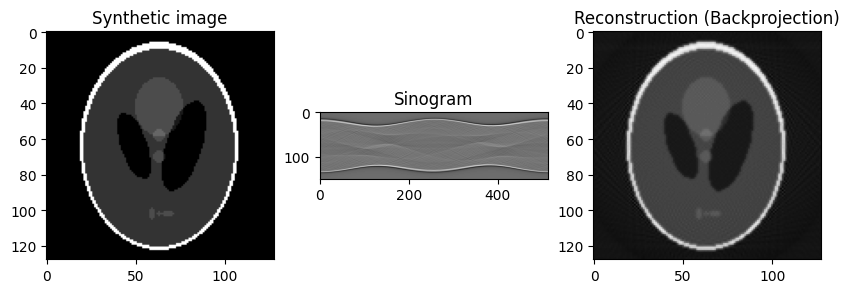

In [93]:
size = np.array([128, 128])
phantom = aomip.shepp_logan(size)
num_angles = 512
arc = 360
A = aomip.XrayOperator(size, [150], np.linspace(0, arc, num_angles), size[0]*100, size[0]*2)
sinogram = A.apply(phantom)
sinogram = aomip.filter_sinogram(sinogram,'shepp-logan')
reconstruct = A.applyAdjoint(sinogram)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1, title="Synthetic image");plt.imshow(phantom, cmap='gray')
plt.subplot(1,3,2, title="Sinogram");plt.imshow(sinogram, cmap='gray')
plt.subplot(1,3,3, title="Reconstruction (Backprojection)");plt.imshow(reconstruct, cmap='gray')
plt.show()


(i) Using fixes step length of $\alpha_k$=0.01

In [94]:
x0 = np.zeros_like(phantom)
beta = 0.1
iteration = 100
alpha = np.ones(iteration)*0.01
fs = []
grad = lambda x : A.applyAdjoint(A.apply(x) - sinogram)

Elapsed time: 111.15457892417908 seconds


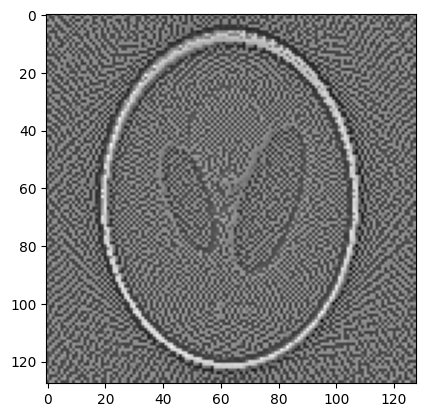

In [95]:
xmin, stopIdx = aomip.subgradient(A,sinogram,x0,beta,alpha,grad,iteration=iteration,callback=callback1)
plt.imshow(xmin, cmap='gray')

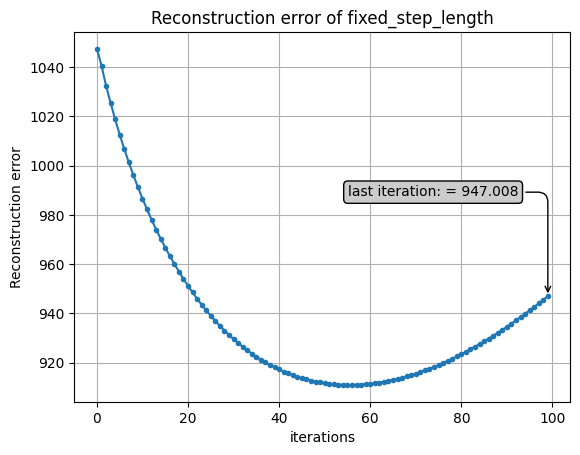

In [102]:
aomip.plot_convergence(phantom,fs,stopIdx,'fixed_step_length','')

$\alpha_k=\frac{1}{k}$

Elapsed time: 346.8962969779968 seconds


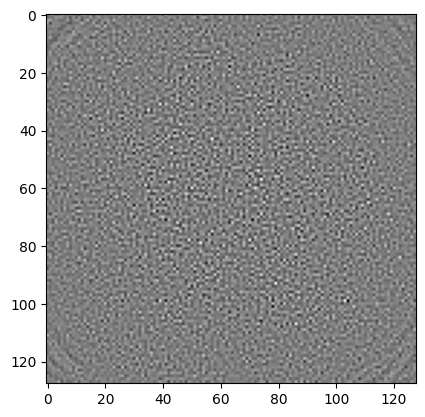

In [113]:
iteration = 300
alpha = 1 / np.arange(1, iteration+1)
fs = []
xmin, stopIdx = aomip.subgradient(A,sinogram,x0,0.01,alpha,grad,iteration=iteration,callback=callback1)
plt.imshow(xmin, cmap='gray')

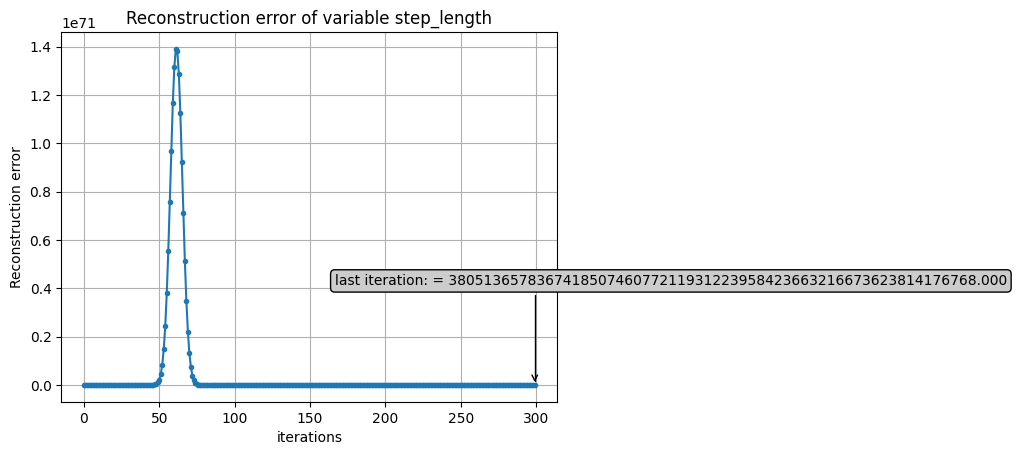

In [114]:
aomip.plot_convergence(phantom,fs,stopIdx,'variable step_length','')

Although the reconstruction for the CT sample above is bad probably because a small iteration number is used as it is extremely taxing to run it on my own machine. But, it can be seen that it performs fairly ok on the challenge dataset where higher iteration number is used which will be explained more in the readme.